In [1]:
import sys
import ast
import numpy as np
from PIL import Image, ImageOps

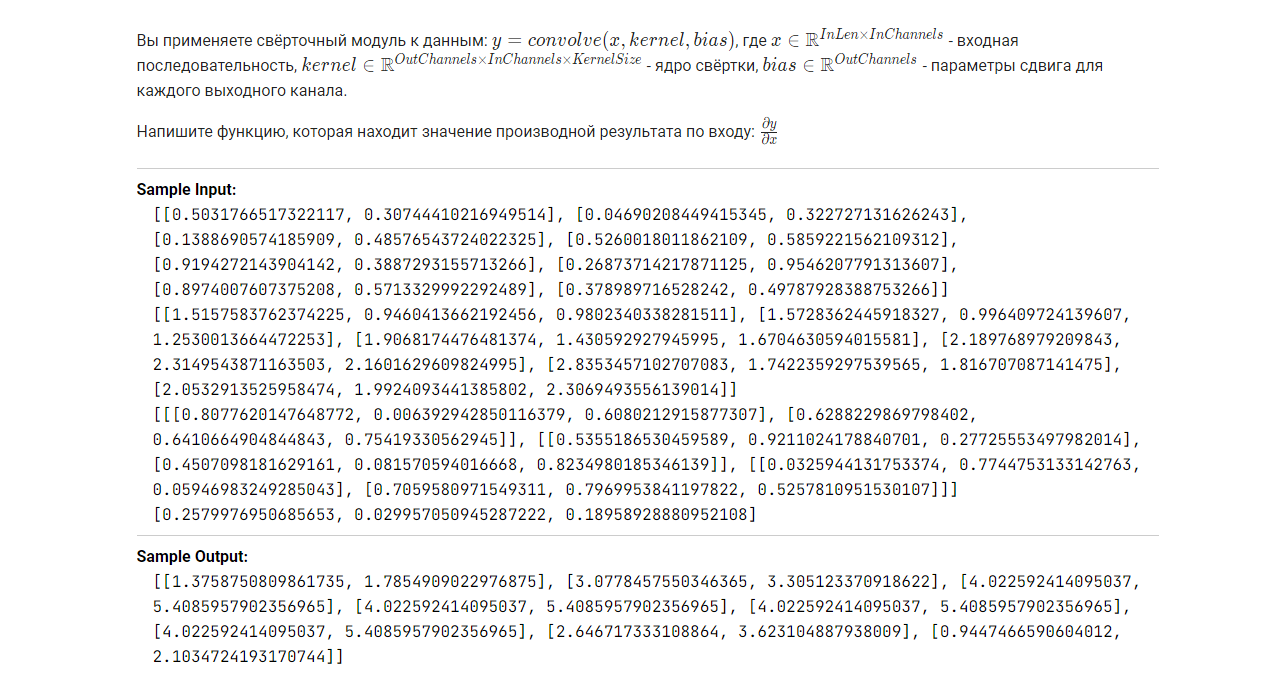

In [2]:
image = Image.open('samsung_nlp_3_8_3.png')
display(image)

In [ ]:
def parse_array(s):
    return np.array(ast.literal_eval(s))

def read_array():
    return parse_array(sys.stdin.readline())

def write_array(arr):
    print(repr(arr.tolist()))

In [ ]:
def calculate_conv_x_grad(x, y, kernel, bias):
    """
    x - InLen x InChannels
    y - OutLen x OutChannels
    kernel - OutChannels x InChannels x KernelSize
    bias - OutChannels

    returns InLen x InChannels
    """
    window_heght = x.shape[0]
    input0 = kernel
    input = []
    out =[]
    for i in range(0, len(input0)):
        input.append(np.array(input0[i]).T)
        #print(i)
        #print(input[i])

    kernel_heght = input[0].shape[0]
    #print(kernel_heght)

    for i in range(0,window_heght):
        if i+1< kernel_heght or (window_heght-i)< kernel_heght:
            if i ==0:
                summa = 0
                for j in input:
                    summa += j[0]
                out.append(summa)
                
            elif i == window_heght-1:
                
                summa = 0
                for j in input:
                    summa += j[-1]
                out.append(summa)

            elif i>0 and i<kernel_heght-1:
                summa = 0
                for j in input:
                    summa += j[:i+1].sum(axis = 0)
                out.append(summa)   

            elif i<window_heght-1 and i> window_heght-kernel_heght:
                summa = 0
                for j in input:
                    summa += j[1:kernel_heght].sum(axis = 0)
                out.append(summa)       

       
        else:
                        
            summa = 0
            for j in input:
                summa +=j.sum(axis = 0)

            out.append(summa)
     
    return np.array(out)

In [ ]:
x = read_array()
y = read_array()
kernel = read_array()
bias = read_array()

result = calculate_conv_x_grad(x, y, kernel, bias)

write_array(result)